In [1]:
!pip install diffusers transformers safetensors accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 22.8 MB/s eta 0:00:00


In [2]:
from diffusers import AutoPipelineForText2Image, AutoPipelineForImage2Image, AutoPipelineForInpainting
from diffusers.utils import load_image
import matplotlib.pyplot as plt
import torch

import requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [3]:
def load_model(pretrained_model_or_path, data_type=torch.float16, device="cuda", pipe_type="t-i"):
  if pipe_type == "t-i":
    pipeline = AutoPipelineForText2Image.from_pretrained(
        pretrained_model_or_path=pretrained_model_or_path,
        torch_dtype=data_type,
        use_safetensors=True
    ).to(device)
  elif pipe_type == "i-i":
    pipeline = AutoPipelineForImage2Image.from_pretrained(
        pretrained_model_or_path=pretrained_model_or_path,
        use_safetensors=True,
        safety_checker=None
    ).to(device)
  elif pipe_type == 'a-i':
     pipeline = AutoPipelineForInpainting.from_pretrained(
        pretrained_model_or_path=pretrained_model_or_path,
        torch_dtype=data_type,
        use_safetensors=True
    ).to(device)
  return pipeline

## AutoText2Image

In [ ]:
def generate_image(pipeline, prompt, num_inference_steps):
  image = pipeline(prompt=prompt, num_inference_steps=num_inference_steps).images[0]
  return image

def print_image(image):
  plt.imshow(image)
  plt.axis('off')
  plt.show()

In [ ]:
def main():
    pretrained_model_or_path = "runwayml/stable-diffusion-v1-5"
    prompt = "pikachu bodybuilder very muscular"
    num_inference_steps = 25

    pipeline = load_model(pretrained_model_or_path)
    image = generate_image(pipeline, prompt, num_inference_steps)
    print_image(image)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

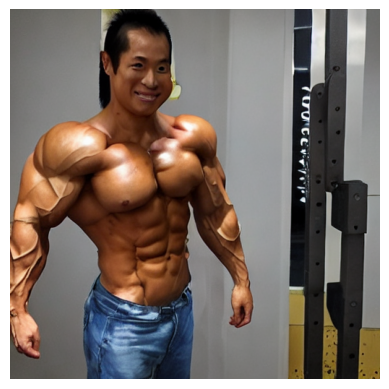

In [ ]:
main()

## AutoImage2Image

In [ ]:
def download_image(url):
  response = requests.get(url)
  image = Image.open(BytesIO(response.content)).convert("RGB")
  return image

def process_image(pipeline, prompt, source_image, num_inference_steps):
  return pipeline(prompt, source_image, num_inference_steps=num_inference_steps).images[0]

def print_image(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [ ]:
def main():
  pretrained_model_or_path = "runwayml/stable-diffusion-v1-5"
  prompt = "the sky is day"
  num_inference_steps = 50

  url = "https://omnesmag.com/wp-content/uploads/2016/05/vangogh.jpg"
  pipeline = load_model(pretrained_model_or_path, pipe_type='i-i')
  source_image = download_image(url)
  #print_image(source_image)
  processed_image = process_image(pipeline, prompt, source_image, num_inference_steps)
  print_image(processed_image)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_img2img.StableDiffusionImg2ImgPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/40 [00:00<?, ?it/s]

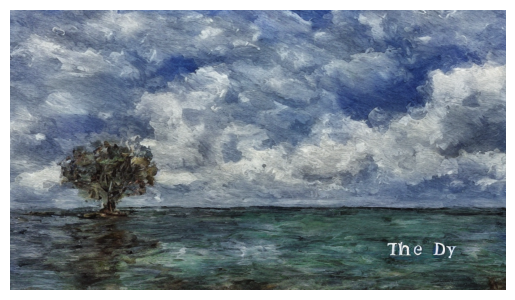

In [ ]:
main()

## AutoInpainting

In [4]:
def generate_inpaint_image(pipeline, prompt, init_image, mask_image, num_inference_steps):
  return pipeline(prompt=prompt, image=init_image, mask_image=mask_image, num_inference_steps=num_inference_steps).images[0]

def print_image(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [5]:
def main():
    pretrained_model_or_path = "stabilityai/stable-diffusion-xl-base-1.0"
    prompt = "Mickey Mouse sitting on a bench"
    num_inference_steps = 75
    image_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png"
    mask_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png"

    init_image = load_image(image_url).convert("RGB")
    mask_image = load_image(mask_url).convert("RGB")

    pipeline = load_model(pretrained_model_or_path)
    generated_image = generate_inpaint_image(pipeline, prompt, init_image, mask_image, num_inference_steps)
    print_image(generated_image)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

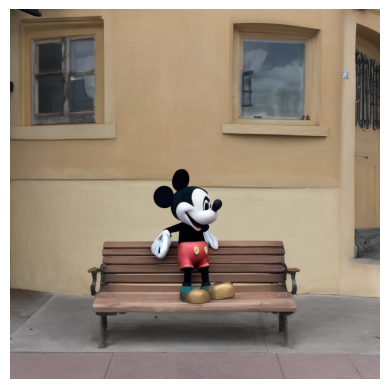

In [6]:
main()